In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import xlrd
# use pandas to read in the excel spreadsheet
df = pd.read_excel('Datasets/pca_uk.xlsx')

# build a matrix of the feature values, not including the text labels
X = np.array([df[i].values for i in df.columns if i != 'Features'])

print(X)

# calculate the PCA
pca = PCA(n_components=2)

# Find the principle components of 17 features
X_r = pca.fit_transform(X)

print(X_r)

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]]
[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]


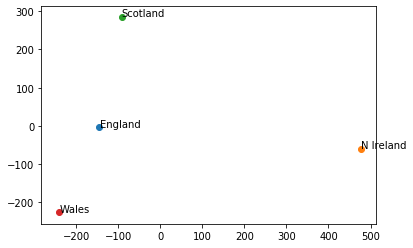

In [2]:
# Lets visualize the principle components

for feature, (plot_x,plot_y) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(plot_x, plot_y)
    plt.text(plot_x+0.3, plot_y+0.3, df.columns[:-1][feature])

plt.show()

In [3]:
# PCA computation by sklearn
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print(X_r)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]
[105073.34576714  45261.62487597]
[0.67444346 0.29052475]
[0.67444346 0.96496821]


### Activity: PCA Steps

**In groups of 3:** Follow the steps here and write a function that computes the principle components for a dataset similar to the one we watched on YouTube: https://www.youtube.com/watch?v=0GzMcUy7ZI0 

**Steps:**

1. Use the following matrix: `X = np.array([[1, 1, 1], [1, 2, 1], [1, 3, 2], [1, 4, 3]])`
1. Subtract the column mean from the feature matrix -> this new matrix will be our centered matrix
1. Calculate the covariance of the centered matrix (check out numpy's resources to see if there's a function that can do this for you...) --> this new matrix will be our covariance matrix.
1. Calculate the eigenvalue and eigenvector of the covariance matrix. Remember how we did this in a previous activity!
1. Sort the eigevalues so that they are in decresing order, and then find the top N (for example, 2) eigenvectors 
1. Dot multiply the centered matrix with the top N eigenvectors of the covariance matrix 
1. Compare the result of custom function with PCA in `sklearn`

In [6]:
a = [1,2,3,4,5]
a[:2]

[1, 2]

## Lab Time

## Activity: Apply Principle to Boston housing features and then train the linear regression model 

- Basically, we remove correlation among features with PCA

- We do not need to do feature data scaling (normalization) when we do PCA for features, because 

- Report the R-squared and MSE for a system with PCA+Linear Regression

In [50]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

boston = load_boston()

# print(boston.data)
# print(boston.data.shape)

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target # our target value is price 

print(bos.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


## Declare the Inputs and Target Variables

In [51]:
target = bos['PRICE']
inputs = bos.drop(['PRICE'],axis=1)

In [87]:
inputs.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


## Scale the Data

In [52]:
# from sklearn.preprocessing import StandardScaler

# # Create a scaler object 
# scaler = StandardScaler()

# # Fit the inputs (calculate the mean and standard deviation feature-wise)
# scaler = scaler.fit(inputs)
# scaler

In [53]:
# # Scale the features and store them in a new variable (the actual scaling procedure)
# inputs_scaled = scaler.transform(inputs)

### Create The Multiple Linear Regression Model

In [91]:
# Import module for splitting data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# split dataset into 75% training and 25% test          #x          #y                    #same sample of data
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, random_state=0)


pca = PCA(n_components=2)
X_r = pca.fit_transform(x_train)

# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets

reg.fit(X_r, y_train)

X_test_reduced = pca.transform(x_test)

y_hat = reg.predict(X_test_reduced)

print(y_hat[:10])
print(y_test[:10].values)
#print(pca.explained_variance_ratio_)
# print(pca.explained_variance_ratio_.cumsum())
print(r2_score(y_test, y_hat))
print(mean_squared_error(y_test, y_hat))

[22.46234941 16.78872364 26.06035013 17.28190766 23.27677263 25.475109
 17.25029736 27.36013067 24.83817934 18.36953785]
[22.6 50.  23.   8.3 21.2 19.9 20.6 18.7 16.1 18.6]
0.21039107665403312
65.7471831055625
